# MAT 388, HW4
**Ozan Yeşil - 090190325**

## Importing Libraries

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ks
from urllib.request import urlopen

from keras.models import Sequential
from keras.layers import Dense, Activation   
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
#from sklearn.datasets import load_iris, load_digits, fetch_20newsgroups_vectorized, fetch_olivetti_faces

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RNN, Dropout, SimpleRNN
from keras.callbacks import EarlyStopping

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Conv3D, ConvLSTM2D, Embedding, Dropout

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from scipy.io import loadmat
import keras
from keras import layers

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

I loaded the dataset to `ds`. I assigned images to `X` and attributes to `y`.

In [68]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load('celeb_a' ,split='train', shuffle_files=True)

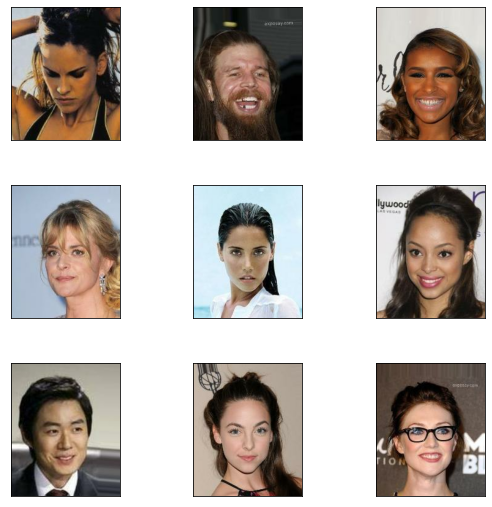

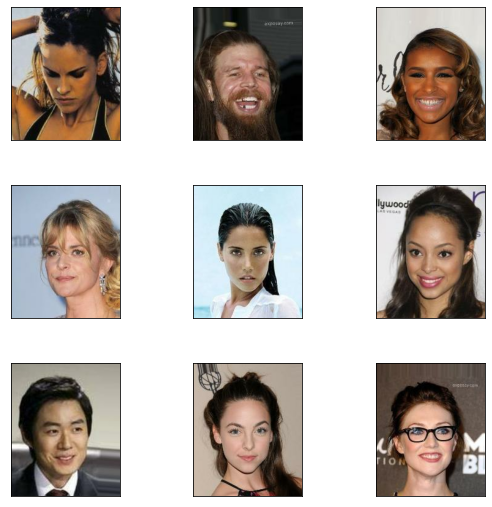

In [69]:
(train, test), info = tfds.load('celeb_a', split=['train','test'], with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

In [70]:
y = [y['attributes'] for y in train.take(2)]

In [71]:
x = [x['image'] for x in train.take(2)]

In [72]:
def tfGetData(df,N,attr):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy())
        y_train.append(fn.get(u['attributes'][attr].numpy(),0))
    return X_train,y_train

In [73]:
X_train,y_train = tfGetData(train,1000,'Eyeglasses')
X_test,y_test = tfGetData(test,200,'Eyeglasses')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [80]:
X_train.shape

(1000, 218, 178, 3)

In [85]:
model = Sequential()
model.add(Conv2D(3, 2, activation='softmax', input_shape=(218,178,3,)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [93]:
model.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
32/32 [==============================] - 13s 420ms/step - loss: 2.5368 - accuracy: 0.7400
Epoch 2/15
32/32 [==============================] - 13s 421ms/step - loss: 0.9950 - accuracy: 0.7950
Epoch 3/15
32/32 [==============================] - 13s 415ms/step - loss: 1.4034 - accuracy: 0.8160
Epoch 4/15
32/32 [==============================] - 14s 427ms/step - loss: 0.2497 - accuracy: 0.9140
Epoch 5/15
32/32 [==============================] - 14s 432ms/step - loss: 0.1288 - accuracy: 0.9430
Epoch 6/15
32/32 [==============================] - 13s 416ms/step - loss: 0.0904 - accuracy: 0.9640
Epoch 7/15
32/32 [==============================] - 13s 397ms/step - loss: 0.0467 - accuracy: 0.9870
Epoch 8/15
32/32 [==============================] - 13s 404ms/step - loss: 0.0343 - accuracy: 0.9970
Epoch 9/15
32/32 [==============================] - 13s 393ms/step - loss: 0.0268 - accuracy: 0.9940
Epoch 10/15
32/32 [==============================] - 13s 402ms/step - loss: 0.0256 - accura

In [94]:
eval_glass = model.evaluate(X_test, y_test)
eval_glass 

7/7 [==============================] - 1s 84ms/step - loss: 0.8451 - accuracy: 0.8300


[0.8451278805732727, 0.8299999833106995]

**4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.**  
**5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.**

In [95]:
X_train,y_train = tfGetData(train,1000,'Male')
X_test,y_test = tfGetData(test,200,'Male')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [96]:
eval_male = model.evaluate(X_test, y_test)
eval_male

7/7 [==============================] - 1s 84ms/step - loss: 2.8242 - accuracy: 0.5850


[2.8242387771606445, 0.5849999785423279]

In [97]:
X_train,y_train = tfGetData(train,1000,'Bangs')
X_test,y_test = tfGetData(test,200,'Bangs')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [98]:
eval_bangs = model.evaluate(X_test, y_test)
eval_bangs

7/7 [==============================] - 1s 85ms/step - loss: 0.7915 - accuracy: 0.8400


[0.791536271572113, 0.8399999737739563]

**The accucracy for `Bangs` was better than `Glass` and then comes `Male`. So, the model for `Glass` is the better considering the loss as well.** 

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
3. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
4. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

**1. Ingest the image data directly from the web. (No local files!)**  
**2. Ingest the ground truth data directly from the web. (No local files!)**

I ingested data from web using urllib. `image` variable contains the KSC.mat file and `image_gt` variable contains ground truth data.

In [56]:
import urllib.request
import urllib
from urllib.request import urlopen

In [57]:
image = urllib.request.urlretrieve('http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat', "KSC.mat")
image_gt = urllib.request.urlretrieve('http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat', "KSC_gt.mat")

In [58]:
image = loadmat("KSC.mat")
image_gt = loadmat("KSC_gt.mat")

In [59]:
result = image.items()
data = list(result)
numpyArray = np.array(data)
image = numpyArray[3][1]

In [60]:
result = image_gt.items()
data = list(result)
numpyArray = np.array(data)
image_gt = numpyArray[3][1]

In [61]:
image.shape

(512, 614, 176)

In [62]:
image_gt.shape

(512, 614)

In [63]:
image[0]

array([[11, 26, 19, ..., 63, 64, 58],
       [ 4, 22, 10, ..., 38, 44, 43],
       [ 6, 16,  9, ..., 48, 47, 49],
       ...,
       [28, 44, 32, ..., 38, 56, 46],
       [28, 37, 31, ..., 39, 42, 31],
       [17, 37, 27, ..., 35, 39, 34]], dtype=uint16)

**3. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.**

I constructed a 2 Dimensional Convolutional neural network bu using `CONV2D`.

## CONV2D Model

In [64]:
model = Sequential()
model.add(Conv2D(3, 2, activation='softmax', input_shape=(614,176,1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(614, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

In [65]:
image= image.reshape(512,614, 176,1)

In [66]:
model.fit(image, image_gt, epochs=10,batch_size=5,verbose=1)

Epoch 1/10
103/103 [==============================] - 84s 796ms/step - loss: 0.7363 - accuracy: 0.0000e+00
Epoch 2/10
103/103 [==============================] - 81s 783ms/step - loss: 0.3017 - accuracy: 0.0000e+00
Epoch 3/10
103/103 [==============================] - 99s 966ms/step - loss: 0.2708 - accuracy: 0.0000e+00
Epoch 4/10
103/103 [==============================] - 93s 899ms/step - loss: 0.2700 - accuracy: 0.0000e+00
Epoch 5/10
103/103 [==============================] - 91s 887ms/step - loss: 0.2592 - accuracy: 0.0000e+00
Epoch 6/10
103/103 [==============================] - 90s 872ms/step - loss: 0.2327 - accuracy: 0.0039
Epoch 7/10
103/103 [==============================] - 94s 914ms/step - loss: 0.1769 - accuracy: 0.0098
Epoch 8/10
103/103 [==============================] - 89s 866ms/step - loss: 0.0764 - accuracy: 0.0039
Epoch 9/10
103/103 [==============================] - 89s 861ms/step - loss: -0.1189 - accuracy: 0.0059
Epoch 10/10
103/103 [==============================]

**4. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)**

In [67]:
model.evaluate(image, image_gt, batch_size = 32)

16/16 [==============================] - 4s 240ms/step - loss: -1.1014 - accuracy: 0.0039


[-1.1013929843902588, 0.00390625]

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.  
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.  
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

**1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.**    

In [25]:
import yfinance as yf

In [26]:
wheat = yf.download("ZW=F",start="2010-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [27]:
wheat

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,557.75,41278
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,553.00,36720
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,567.25,38503
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,557.75,33873
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,568.50,33873
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,812.50,820.50,808.25,814.75,814.75,36615
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,804.00,30210
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,783.50,41877


In [29]:
test = yf.download("ZW=F", start = "2022-01-01")
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04 00:00:00-05:00,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05 00:00:00-05:00,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06 00:00:00-05:00,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07 00:00:00-05:00,748.00,760.75,735.50,758.50,758.50,58463
...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,741.00,742.50,728.75,728.75,728.75,103
2022-12-14 00:00:00-05:00,728.25,728.25,728.25,728.25,728.25,41587
2022-12-15 00:00:00-05:00,749.75,767.00,745.00,757.25,757.25,51207


**2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.**

In [30]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [31]:
X_train,X_test,Y_train,Y_test = load_data(wheat['Open'],12)

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'relu'))

model.compile(loss='mape', optimizer='adam', metrics = ['mse'])

In [41]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/10
601/601 [==============================] - 2s 3ms/step - loss: 6.8790 - mse: 4257.9019 - val_loss: 3.4438 - val_mse: 865.3577
Epoch 2/10
601/601 [==============================] - 2s 3ms/step - loss: 6.7917 - mse: 4114.5620 - val_loss: 2.7394 - val_mse: 554.4956
Epoch 3/10
601/601 [==============================] - 2s 3ms/step - loss: 7.1178 - mse: 4481.9375 - val_loss: 12.2530 - val_mse: 9532.0703
Epoch 4/10
601/601 [==============================] - 2s 3ms/step - loss: 6.9837 - mse: 4344.5063 - val_loss: 2.3164 - val_mse: 406.0305
Epoch 5/10
601/601 [==============================] - 2s 3ms/step - loss: 6.8739 - mse: 4137.0928 - val_loss: 7.8152 - val_mse: 3977.0334
Epoch 6/10
601/601 [==============================] - 2s 3ms/step - loss: 6.7096 - mse: 3851.1873 - val_loss: 6.5515 - val_mse: 2846.7734
Epoch 7/10
601/601 [==============================] - 2s 3ms/step - loss: 7.0700 - mse: 4315.8389 - val_loss: 6.2504 - val_mse: 2609.1511
Epoch 8/10
601/601 [================

# RNN

In [49]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape = (1,1), activation = 'relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='linear'))

early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
    
model_rnn.compile(loss = 'mape', optimizer = 'adam', metrics = ['mse'])

In [52]:
model_rnn.fit(X_train,Y_train,epochs=10,batch_size=5,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
601/601 [==============================] - 1s 2ms/step - loss: 11.3858 - mse: 7202.6138 - val_loss: 2.0014 - val_mse: 295.4271
Epoch 2/10
601/601 [==============================] - 1s 2ms/step - loss: 11.3552 - mse: 7088.6245 - val_loss: 3.6893 - val_mse: 1022.9966
Epoch 3/10
601/601 [==============================] - 1s 2ms/step - loss: 11.6124 - mse: 7302.8701 - val_loss: 2.7882 - val_mse: 596.1634
Epoch 4/10
601/601 [==============================] - 1s 2ms/step - loss: 11.3185 - mse: 6937.3862 - val_loss: 1.8932 - val_mse: 262.6628
Epoch 5/10
601/601 [==============================] - 1s 2ms/step - loss: 11.3010 - mse: 6980.9941 - val_loss: 4.8853 - val_mse: 1675.0015
Epoch 6/10
601/601 [==============================] - 1s 2ms/step - loss: 11.2431 - mse: 6812.7422 - val_loss: 1.5742 - val_mse: 201.7225
Epoch 7/10
601/601 [==============================] - 1s 2ms/step - loss: 11.4584 - mse: 7017.5283 - val_loss: 4.0748 - val_mse: 1223.2831
Epoch 8/10
601/601 [===========

**3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.**

I evaluated the test set at once using `evaluate` attribute for both the LSTM and the RNN model. 

In [53]:
X_test_wheat = np.array(test[['Open']][1:].reset_index(drop = True))
Y_test_wheat = np.array(test['Open'][0:242].reset_index(drop = True))

In [54]:
model.evaluate(X_test_wheat, Y_test_wheat, batch_size = 32)

8/8 [==============================] - 0s 5ms/step - loss: 14.6308 - mse: 31186.3008


[14.630813598632812, 31186.30078125]

In [55]:
model_rnn.evaluate(X_test_wheat, Y_test_wheat, batch_size = 32)

8/8 [==============================] - 0s 4ms/step - loss: 2.8286 - mse: 1248.8236


[2.8285608291625977, 1248.8236083984375]

In RNN model, the result is better than the LSTM model. But, event the better model has a high mean squared error. So, it is hard to say that the model worked.

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).  

3. Split your dataset into train and test.  
4. Construct an an appropriate neural network model on the train set.  
5. Test your model on the test set. Did your model work? Explain.

**1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv')
data = data[['Issue', 'Timely response?']]

In [4]:
data = data.dropna()
data.head()

,Issue,Timely response?
0,Communication tactics,Yes
1,Cont'd attempts collect debt not owed,Yes
2,"Application, originator, mortgage broker",Yes
3,Other,Yes
4,Cont'd attempts collect debt not owed,Yes


**2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).**

I transformed `Timely Response` column with fit_transform() and binarized labels. 

In [5]:
lb = LabelBinarizer()
label = lb.fit_transform(data['Timely response?'])
label = np.hstack((label, 1 - label))
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [6]:
vectorizer = CountVectorizer()
issue_vectorized = vectorizer.fit_transform(data['Issue']).toarray()
vectorizer.get_feature_names_out()

array(['account', 'acct', 'action', 'adding', 'advance', 'advertising',
       'amount', 'amt', 'an', 'and', 'application', 'applied', 'apply',
       'apr', 'arbitration', 'are', 'atm', 'attempts', 'available',
       'balance', 'bank', 'bankruptcy', 'being', 'billing', 'broker',
       'by', 'can', 'cancelling', 'card', 'cash', 'caused', 'changes',
       'charged', 'charges', 'check', 'checks', 'closing', 'collect',
       'collection', 'communication', 'company', 'cont', 'contact',
       'convenience', 'costs', 'credit', 'credited', 'customer',
       'damaged', 'day', 'dealing', 'debit', 'debt', 'decision',
       'decrease', 'delay', 'delinquent', 'deposits', 'destroyed',
       'determination', 'did', 'didn', 'disclosure', 'disclosures',
       'disputes', 'embezzlement', 'escrow', 'excessive', 'exchange',
       'expect', 'false', 'features', 'fee', 'fees', 'for', 'forbearance',
       'foreclosure', 'fraud', 'funds', 'get', 'getting', 'identity',
       'illegal', 'improper',

**3. Split your dataset into train and test.**

In [7]:
X_train,X_test,y_train,y_test = train_test_split(issue_vectorized, label,train_size=0.75)

In [8]:
y_train.shape

(21115, 2)

**4. Construct an an appropriate neural network model on the train set.**

In [9]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='softmax'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [14]:
model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
165/165 [==============================] - 1s 6ms/step - loss: 0.1053 - accuracy: 0.9743 - val_loss: 0.0991 - val_accuracy: 0.9758
Epoch 2/10
165/165 [==============================] - 1s 6ms/step - loss: 0.1053 - accuracy: 0.9743 - val_loss: 0.0990 - val_accuracy: 0.9758
Epoch 3/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1054 - accuracy: 0.9743 - val_loss: 0.0991 - val_accuracy: 0.9758
Epoch 4/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.9743 - val_loss: 0.0990 - val_accuracy: 0.9758
Epoch 5/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1055 - accuracy: 0.9743 - val_loss: 0.0990 - val_accuracy: 0.9758
Epoch 6/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1054 - accuracy: 0.9743 - val_loss: 0.0990 - val_accuracy: 0.9758
Epoch 7/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1052 - accuracy: 0.9743 - val_loss: 0.0991 - val_accuracy: 0.9758
Epoch 

**5. Test your model on the test set. Did your model work? Explain.**

In [15]:
y_pred = model.predict(X_test).argmax(axis=1)
yy_test = y_test.argmax(axis=1)
res = confusion_matrix(yy_test,y_pred)

220/220 [==============================] - 1s 2ms/step


In [16]:
res

array([[6869,    0],
       [ 170,    0]], dtype=int64)

In [17]:
print(classification_report(yy_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6869
           1       0.00      0.00      0.00       170

    accuracy                           0.98      7039
   macro avg       0.49      0.50      0.49      7039
weighted avg       0.95      0.98      0.96      7039



**It did a good job on labels that are actually `0` label. But, it also classified all `1` labels as `0`. Also, in the Classification report it can be seen that metrics for the label `1` is all 0 which is the worst scenario. So, we can not say that the model worked well.**